Вам предоставлен файл search_data.parquet - данные по результатам парсинга поисковой выдачи маркетплейса
по более чем 100 различным поисковым запросам, в разных регионах, за один день. 
Выполните все пункты, используя Python, и сохраните файл ipynb с указанием фамилии в названии.
ВАЖНО: Просто графика или мнения недостаточно - покажите, как вы пришли к выводу через код и данные.

Дополнительные комментарии:
Выдача - позиция товара в поисковой выдаче по "Запросу".
Например, если у товара Выдача = 1 по Запросу "apple iphone 11 pro чехол" - это означает,
что при поиске такого запроса на маркетплейсе этот товар был показан первым 
Номенклатура - уникальный ID товара
Реклама - флаг, включена ли реклама у товара 
Стоимость рекламы, Позиция с рекламой, Позиция до рекламы - в исходнике - ненулевые только для товаров, у которых включена реклама

# 1. Обработка данных

In [1]:
import pandas as pd

In [2]:
# Считывание данных
data = pd.read_parquet("search_data.parquet")

In [3]:
data.head()

,Дата парсинга,Выдача,Номенклатура,Рейтинг,Отзывы,Цена,Стоимость рекламы,Позиция с рекламой,Позиция до рекламы,Регион,Новинка,Модель,Запрос,Акция,Бренд,Название,Реклама,Остатки,Тип рекламы
0,2025-09-12,1,172706235,4.9,223,316,2151,1,444,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол,СКИДКИ ПОСПЕЛИ,MagicCase,Силиконовый чехол на iPhone 11 Pro с защитой к...,Да,Электросталь WB:53;,поиск
1,2025-09-12,1,481174536,0.0,0,350,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол pinterest,СКИДКИ ПОСПЕЛИ,CHEHOO,Чехол на iPhone 11 Pro с драконом,None,СЦ Кавказский бульвар:29;,None
2,2025-09-12,1,287575556,4.0,1,428,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол y2k,None,RR CASE,Чехол на IPHONE 11 PRO силиконовый с принтом y2k,None,склад продавца Внуково:50;,None
3,2025-09-12,1,439036487,4.2,9,369,280,1,26,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол Россия,СКИДКИ ПОСПЕЛИ,Cases_Sores_,Чехол на iPhone 11 Pro с принтом черный Герб,Да,Электросталь WB:34;,поиск
4,2025-09-12,1,189604363,5.0,3,403,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол аниме,None,Street fox ^.^,Чехол на iPhone 11 Pro с принтом Аниме,None,склад продавца Алексин:9;,None


1) Из поля "Остатки": извлеките числа и просуммировайте, результат должен появиться в новой колонке "stock_total", старую колонку удалить

In [23]:
import re

data["stock_total"] = data['Остатки'].apply(lambda x: re.search(r"\d+", x)[0] if x is not None else x)
data.drop("Остатки", axis=1, inplace=True)

In [24]:
data.head()

,Дата парсинга,Выдача,Номенклатура,Рейтинг,Отзывы,Цена,Стоимость рекламы,Позиция с рекламой,Позиция до рекламы,Регион,Новинка,Модель,Запрос,Акция,Бренд,Название,Реклама,Тип рекламы,stock_total
0,2025-09-12,1,172706235,4.9,223,316,2151,1,444,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол,СКИДКИ ПОСПЕЛИ,MagicCase,Силиконовый чехол на iPhone 11 Pro с защитой к...,Да,поиск,53
1,2025-09-12,1,481174536,0.0,0,350,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол pinterest,СКИДКИ ПОСПЕЛИ,CHEHOO,Чехол на iPhone 11 Pro с драконом,None,None,29
2,2025-09-12,1,287575556,4.0,1,428,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол y2k,None,RR CASE,Чехол на IPHONE 11 PRO силиконовый с принтом y2k,None,None,50
3,2025-09-12,1,439036487,4.2,9,369,280,1,26,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол Россия,СКИДКИ ПОСПЕЛИ,Cases_Sores_,Чехол на iPhone 11 Pro с принтом черный Герб,Да,поиск,34
4,2025-09-12,1,189604363,5.0,3,403,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол аниме,None,Street fox ^.^,Чехол на iPhone 11 Pro с принтом Аниме,None,None,9


2) Добавьте новый признак: уровень рейтинга (низкий / средний / высокий). Меньше 3.5 - низкий, больше 4.5 - высокий, всё остальное - средний. Результат должен появиться в новой колонке "level_rating", старую колонку нужно оставить

In [27]:
def set_rating_level(rating):
    if rating < 3.5:
        return "низкий"
    elif rating > 4.5:
        return "высокий"
    else:
        return "средний"

data['level_rating'] = data['Рейтинг'].apply(lambda x: set_rating_level(x))

In [28]:
data.head()

,Дата парсинга,Выдача,Номенклатура,Рейтинг,Отзывы,Цена,Стоимость рекламы,Позиция с рекламой,Позиция до рекламы,Регион,Новинка,Модель,Запрос,Акция,Бренд,Название,Реклама,Тип рекламы,stock_total,level_rating
0,2025-09-12,1,172706235,4.9,223,316,2151,1,444,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол,СКИДКИ ПОСПЕЛИ,MagicCase,Силиконовый чехол на iPhone 11 Pro с защитой к...,Да,поиск,53,высокий
1,2025-09-12,1,481174536,0.0,0,350,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол pinterest,СКИДКИ ПОСПЕЛИ,CHEHOO,Чехол на iPhone 11 Pro с драконом,None,None,29,низкий
2,2025-09-12,1,287575556,4.0,1,428,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол y2k,None,RR CASE,Чехол на IPHONE 11 PRO силиконовый с принтом y2k,None,None,50,средний
3,2025-09-12,1,439036487,4.2,9,369,280,1,26,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол Россия,СКИДКИ ПОСПЕЛИ,Cases_Sores_,Чехол на iPhone 11 Pro с принтом черный Герб,Да,поиск,34,средний
4,2025-09-12,1,189604363,5.0,3,403,0,0,0,Казань,None,iPhone 11 Pro,apple iphone 11 pro чехол аниме,None,Street fox ^.^,Чехол на iPhone 11 Pro с принтом Аниме,None,None,9,высокий


3) Заменить нули в колонках "Позиция с рекламой", "Позиция до рекламы" на значение из колонки "Выдача"

In [33]:
data["Позиция с рекламой"] = data["Позиция с рекламой"].fillna(data["Выдача"])
data["Позиция до рекламы"] = data["Позиция до рекламы"].fillna(data["Выдача"])

4. Визуализируйте распределение и очистите данные от выбросов по колонкам: "Цена", "Рейтинг". Объясните свой метод избавления от выбросов

In [47]:
import matplotlib.pyplot as plt
import numpy as np

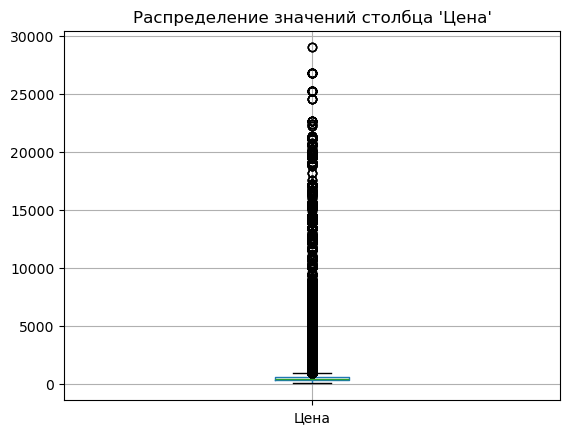

In [43]:
data.boxplot(['Цена'])
plt.title("Распределение значений столбца 'Цена'")
plt.show()

Для удаления выбросов выбираю метод IQR (интерквартильный размах с коэффициентом 1.5).

In [63]:
Q1 = np.percentile(data['Цена'], 25)
Q3 = np.percentile(data['Цена'], 75)
iqr = Q3 - Q1
upper_limit = Q3 + 1.5 * iqr
data_cleaned = data[data['Цена'] < upper_limit].copy()

In [64]:
data_cleaned.shape

(1548726, 20)

In [65]:
data.shape

(1572069, 20)

In [68]:
print(f"Удалено {round((data.shape[0] - data_cleaned.shape[0])/data.shape[0] * 100, 2)}% данных после очистки выбросов по атрибуту 'Цена' по методу IQR")

Удалено 1.48% данных после очистки выбросов по атрибуту 'Цена' по методу IQR


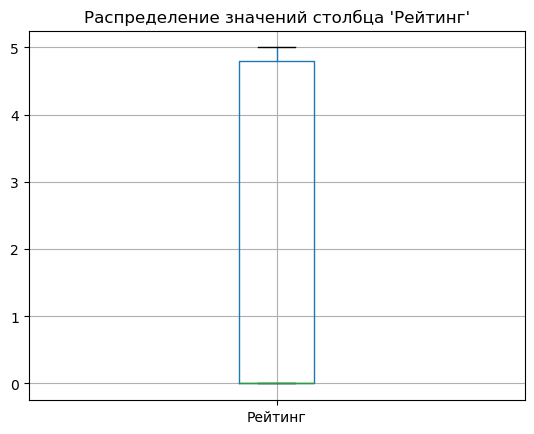

In [45]:
data.boxplot(['Рейтинг'])
plt.title("Распределение значений столбца 'Рейтинг'")
plt.show()

По столбцу 'Рейтинг' выбросов нет

5) Визуализируйте пропуски гистограммой. Чем объясняются эти пропуски? Как с ними поступить?

In [7]:
import seaborn as sns

# Ваш код здесь
# <...>
pass

# 2. Визуализация данных

1) Постройте гистограмму(ы), показывающую(ие) распределение места товаров в поисковой выдаче (Выдача) в зависимости от цены (с шагом 50 рублей) для региона Москва.

In [8]:
# Ваш код здесь
# <...>
pass



2) Есть ли связь между товарными остатками и позицией в выдаче? Постройте scatter plot, оцените связь

In [9]:
# Ваш код здесь
# <...>
pass



# 3. Анализ данных

1) Рассчитайте медианную позицию в выдаче по уровням рейтинга

In [10]:
# Ваш код здесь
# <...>
pass



2) Сравните среднюю позицию товаров с одинаковой Номенклатурой в разных регионах. Приведите топ-20 номенклатур с наибольшим расхождением (например, в одном регионе — в топ-3, а в другом — ниже 30-го места).

In [11]:
# Ваш код здесь
# <...>
pass



3) Корреляционный анализ: какие факторы больше всего коррелируют с “Выдача”?

In [12]:
# Ваш код здесь
# <...>
pass



# 4. Бизнес-выводы

Ответьте на вопросы и обоснуйте на основе данных\
4.1 Какие факторы сильнее всего влияют на позицию товара? \
4.2 Почему одинаковый товар может занимать разные позиции в разных регионах? \
4.3 Какие действия вы бы рекомендовали для улучшения позиций? \
4.4 Сформулируйте 1–2 гипотезы, которые можно проверить с помощью A/B-теста на этих данных